In [2]:
from IPython.display import HTML
HTML('''<script>
code_show=true;
function code_toggle() {
if (code_show){
$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show}
$( document ).ready(code_toggle);
</script>The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

### Using regular expressions in `Python`

In this problem you will write a rudimentary web crawler to extract information from `Wikipedia`.

The three requirements for this problem are:
##### 1. Get a chronological list of US Presidents from the [List of Presidents of the United States](https://en.wikipedia.org/wiki/List_of_Presidents_of_the_United_States) . 

You will have to write a function called `getPresidents(url)` which takes one argument, a string containing the url, and returns the list of URLs for the wikipedia pages for each US President in the chronological order of their presidency, i.e., `['https://en.wikipedia.org/wiki/George_Washington', 'https://en.wikipedia.org/wiki/John_Adams'] ...`

The url argument to the function should be - https://en.wikipedia.org/wiki/List_of_Presidents_of_the_United_States

You will notice that one president, Grover Cleveland, will appear twice. For his case, remove the second entry. Reason he comes twice will be apparent once you visit his entry on `Wikipedia`. While there you will also notice that he was the Mayor of Buffalo once, which is why we have the Grover Cleveland Highway in South Campus.

To write this function you will need to use the module `requests` which allows grabbing the html from any url. For instance:
```python
import requests
import re

url = "https://www.cse.buffalo.edu"
urlreq = request.get(url)
urltext = urlreq.txt
urllines = re.split(r'\n',urltext)
```

In the above snippet, urllines will be a `list` containing lines of the html code in the above website.

You will then write a parser that will go through the html lines and extract the list of presidents. You can check the actual page to see where that list is. 

**Note:** No points will be awarded to this problem if you have manually created the list or derived the list from an alternative url.

##### 2. Parse each President entry in `Wikipedia` and extract his date of birth.
On each President's wikipedia entry, the `infobox` on the right lists, among other things, his exact birthday. Implement a function, called `getBirthdays(urls)` which takes as input the list that is returned by the above implemented `getPresidents(url)` function and returns a `Pandas` `TimeSeries` object, that simply contains the names of the Presidents as the value, and the birthdate as the time index.

##### 3. Plot an annotated `timeline` plot using `matplotlib`.
Use `matplotlib` routines to plot **time line** of the US presidents, where the x-axis corresponds to time from 1720 until 2000 and y-axis denotes the birthdate for each president. The timeline plot should look similar to:

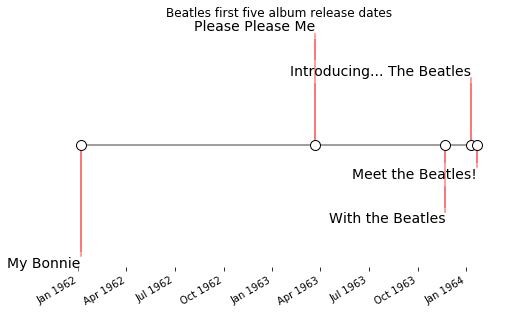

You will need to adjust the heights, font sizes, etc., to make it look clean.

Note that there is not direct function for plotting a module, you will just need to iterate over the values to create several overlaid plots with desired effects.

In [1]:
import requests
import re
import string
import pandas as pd

In [2]:
def getPresidents(url):
    urlreq = requests.get(url)
    urltext = urlreq.text
    urllines = re.split(r'\n',urltext)
    PresidentsRegex = re.compile(r"<big><a href=\"(\/wiki\/.*)\" title=\".*\">.*<\/a><\/big>").search
    presidents_list=[match.group(1) for lines in urllines for match in (PresidentsRegex(lines),) if match]
    baseURL="https://en.wikipedia.org"
    presidents_urls=[baseURL+president for president in presidents_list]
    presidents_urls=sorted(set(presidents_urls), key=presidents_urls.index)
    return presidents_urls

In [3]:
def getBirthdays(urls):
    dobs=[]
    names=[]
    for url in urls:
        urlreq = requests.get(url)
        urltext = urlreq.text
        urllines = re.split(r'\n',urltext)
        DOBRegex = re.compile(r"(<span class=\"bday\">)(\d{4}-\d{2}-\d{2})(</span>)").search
        TitleRegex = re.compile(r"(<h1 id=\"firstHeading\" class=\"firstHeading\" lang=\"en\">)(.*)(</h1>)").search
        dob=[match.group(2) for lines in urllines for match in (DOBRegex(lines),) if match]
        pname=[match.group(2) for lines in urllines for match in (TitleRegex(lines),) if match]
        dobs.append(dob[0])
        names.append(pname[0])
    index = pd.DatetimeIndex(dobs)
    data = pd.Series(names, index=index)
    return data

url = "https://en.wikipedia.org/wiki/List_of_Presidents_of_the_United_States"
list=getPresidents(url)
data=getBirthdays(list)

C:\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


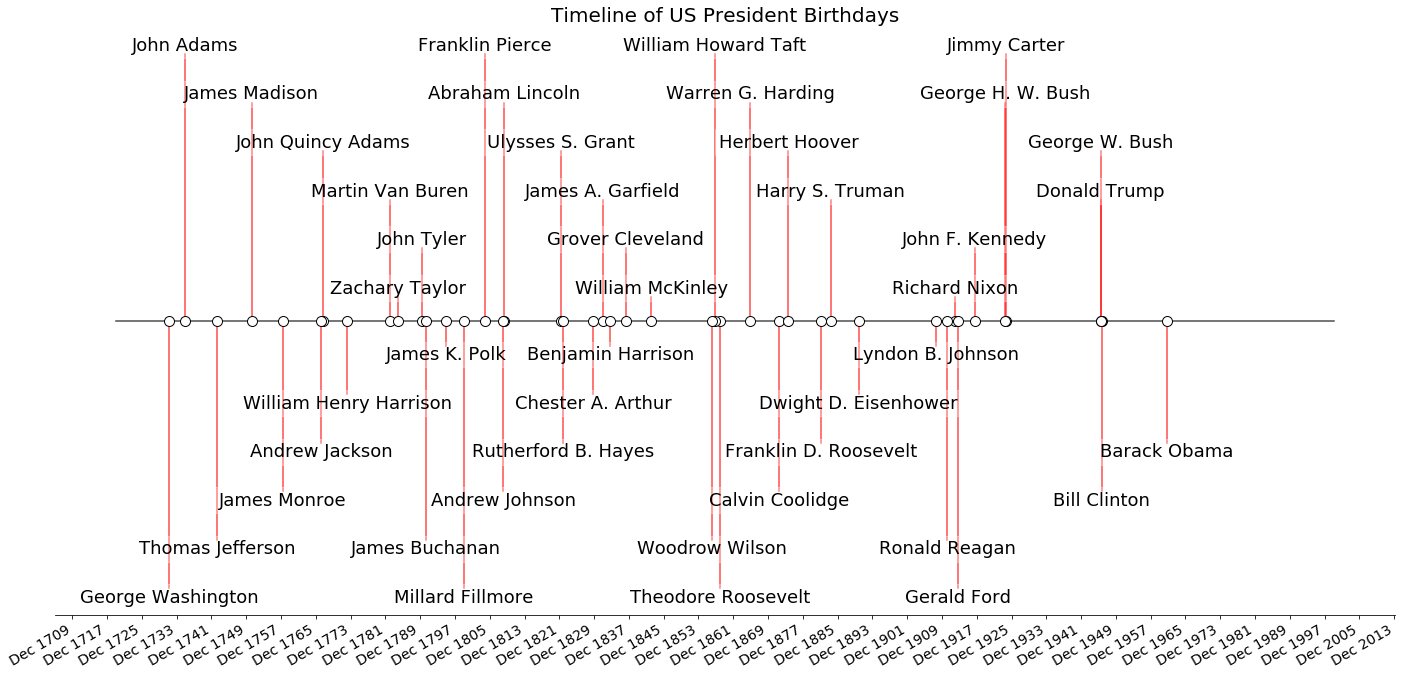

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import matplotlib.dates as mdates
%matplotlib inline

#Extract names and dates from Series object
names = [name for name in data.values]
dates = [date.to_pydatetime() for date in data.index]

levels = np.array([-11, 11, -9, 9, -7, 7, -5, 5, -3, 3, -1, 1])
fig, ax = plt.subplots(figsize=(24, 12))

# Create the base line
start = datetime(1720,1,1,0,0,0)
stop = datetime(2000,1,1,0,0,0)
ax.plot((start, stop), (0, 0), 'k', alpha=.7)

# Iterate through president names and date of births
for ii, (iname, idate) in enumerate(zip(names, dates)):
    level = levels[ii % 12]
    vert = 'top' if level < 0 else 'bottom'

    ax.scatter(idate, 0, s=100, facecolor='w', edgecolor='k', zorder=9999)
    # Plot a line for each president name and date
    ax.plot((idate, idate), (0, level), c='r', alpha=.7)
    # Set text style
    ax.text(idate, level, iname,
            horizontalalignment='center', verticalalignment=vert, fontsize=18,
            backgroundcolor=(1., 1., 1., .3))
ax.set(title="Timeline of US President Birthdays")

ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=96))
ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b %Y"))

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 

ax.title.set_fontsize(20)
fig.autofmt_xdate()

# Removing frame spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.setp((ax.get_yticklabels() + ax.get_yticklines()), visible=False)
plt.show()